In [1]:
%matplotlib inline
import Oscilloscope
import time
import Waveform
import matplotlib.pyplot as plt
import numpy as np

import datetime


In [2]:
HDO = Oscilloscope.Oscilloscope("192.168.0.88")

In [ ]:
HDO.beep()

The scope got triggered at 1519924092


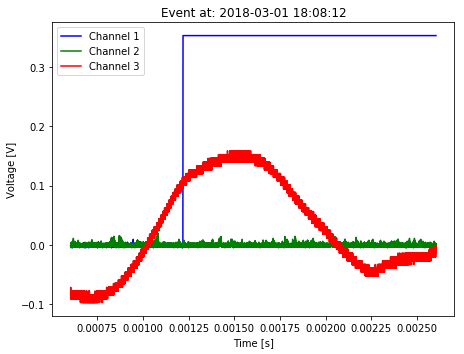

The scope got triggered at 1519924226


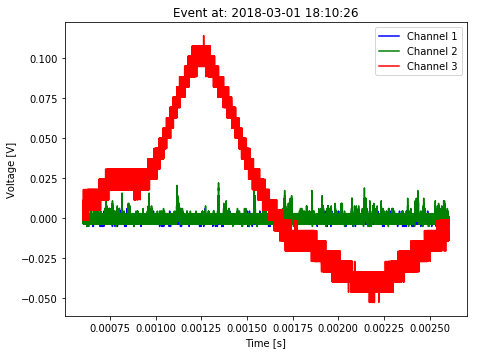

The scope got triggered at 1519924315


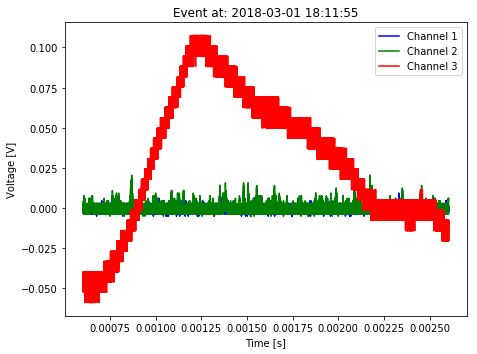

The scope got triggered at 1519924488


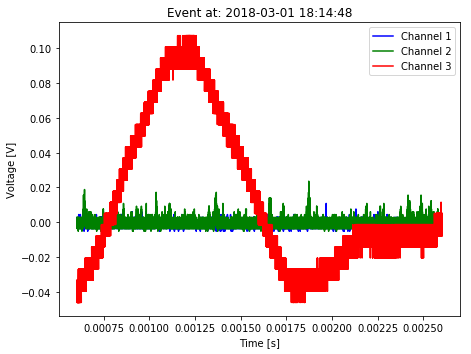

The scope got triggered at 1519924559


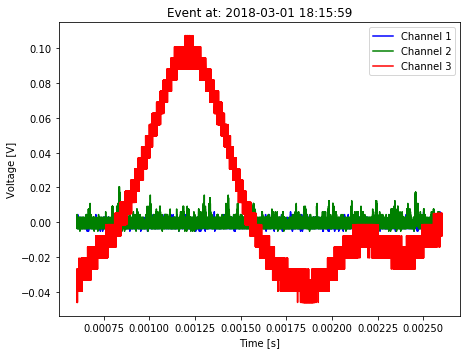

The scope got triggered at 1519924623


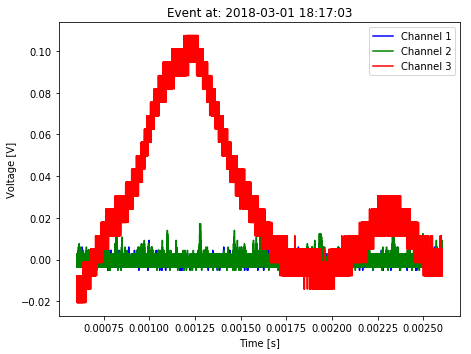

The scope got triggered at 1519924725


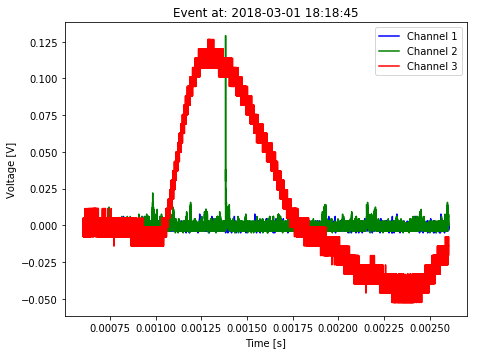

The scope got triggered at 1519924981


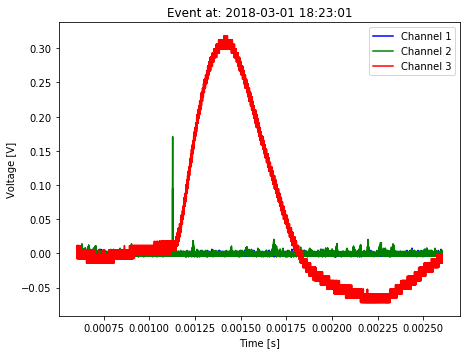

The scope got triggered at 1519925040


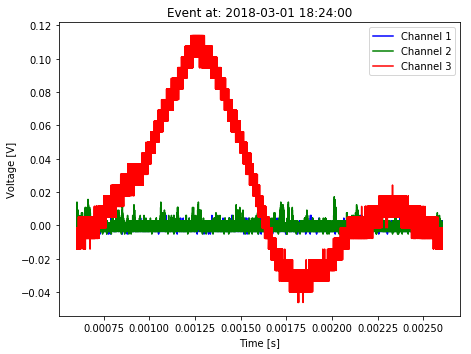

The scope got triggered at 1519925069


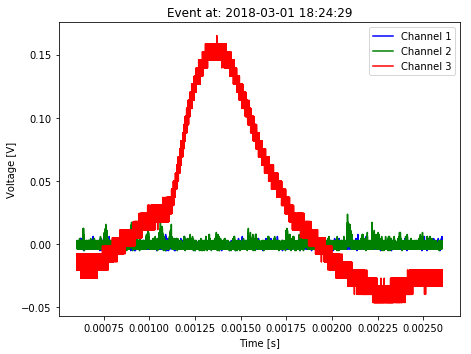

The scope got triggered at 1519925131


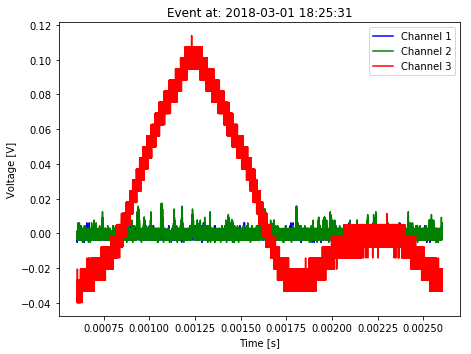

The scope got triggered at 1519925199


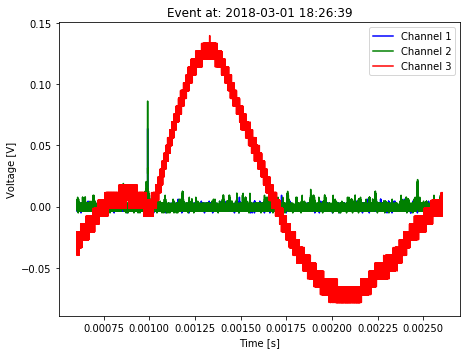

The scope got triggered at 1519925477


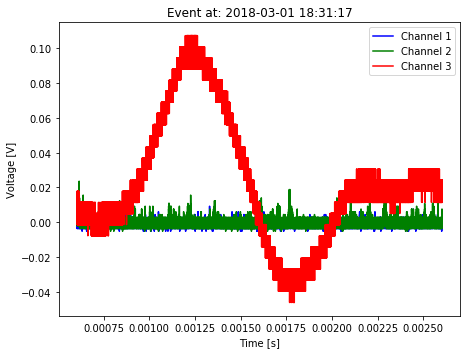

The scope got triggered at 1519925494


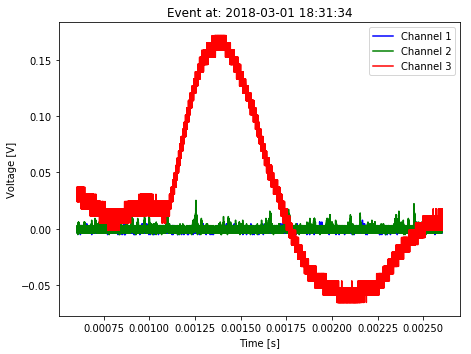

The scope got triggered at 1519925681


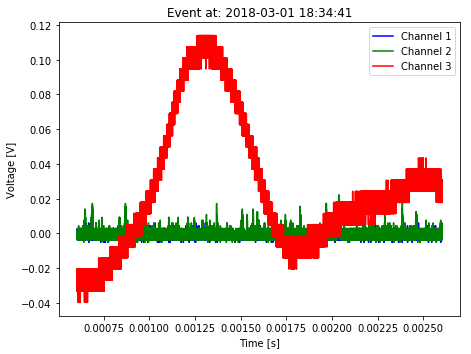

The scope got triggered at 1519925842


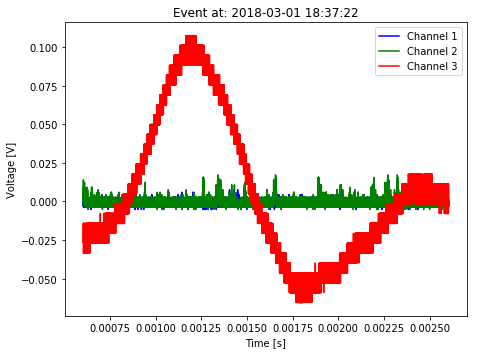

The scope got triggered at 1519925871


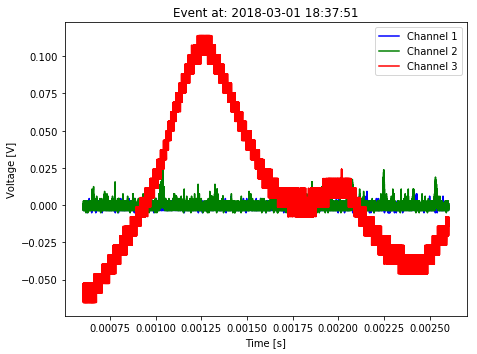

The scope got triggered at 1519925998


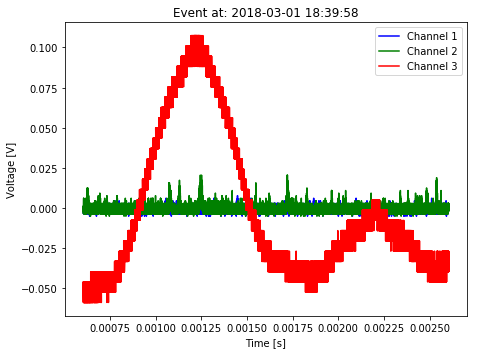

The scope got triggered at 1519926015


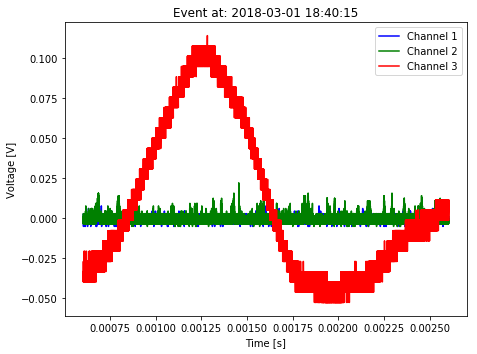

The scope got triggered at 1519926133


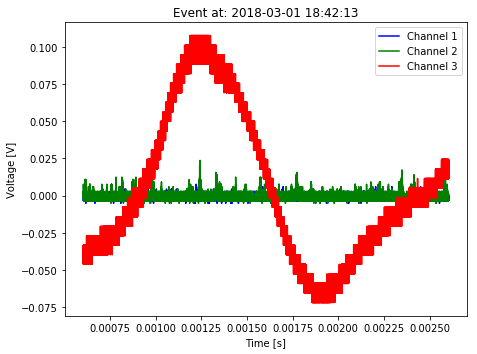

The scope got triggered at 1519926200


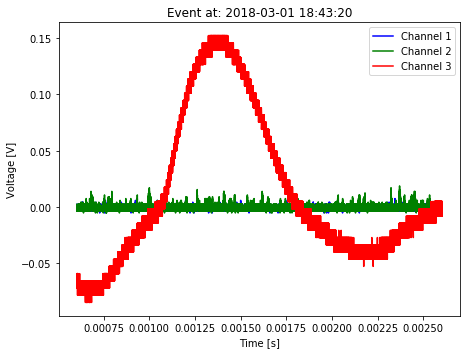

The scope got triggered at 1519926220


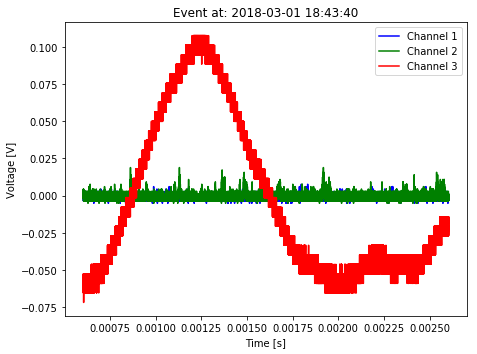

The scope got triggered at 1519926542


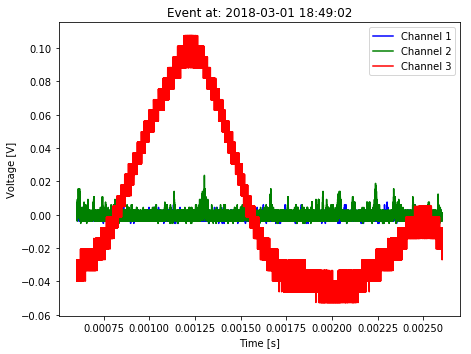

The scope got triggered at 1519926794


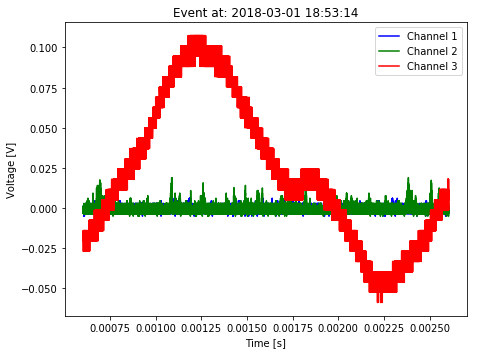

The scope got triggered at 1519926952


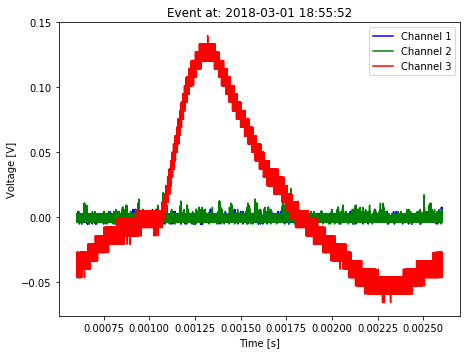

The scope got triggered at 1519927004


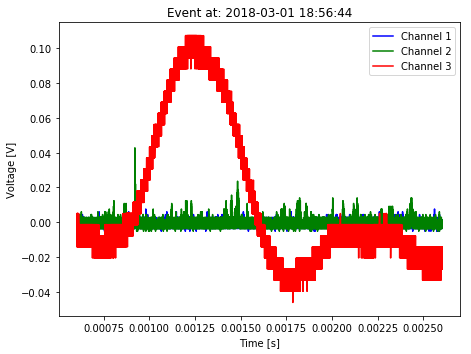

The scope got triggered at 1519927066


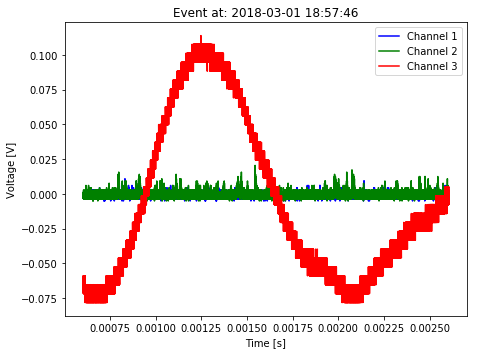

The scope got triggered at 1519927085


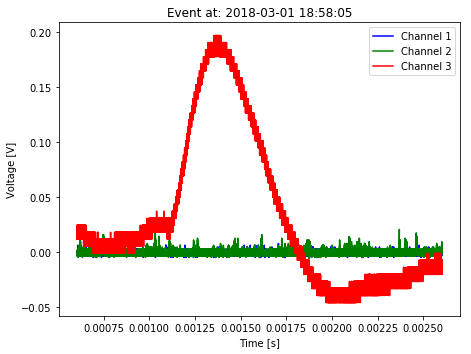

In [ ]:
# This will indefenelty poll the oscilloscope for a new trigger
# When triggered all waveforms will be recieved from the scope and saved to disk
# When saved to disk the wavefroms will be plotted
# The plotting takes quite long, so this is only viable when the rate of the trigger is very low
# Additionally there are methods to read out multiple traces in bulk,
# while this would speed up the process of data taking significantly,
# the resulting format can currently not be read by the Wavefrom class.


channels_to_monitor = [1,2,3]
size_factor = 0.6

while True:
    # set the oscilloscope to "Single" trigger mode, then poll if something happend
    HDO.arm()
    # wait for an event to happen
    while (HDO.get_trigger_mode() == 'SINGLE'):
        time.sleep(0.05)
    
    current_time = int(time.time())
    readable_time = datetime.datetime.fromtimestamp(current_time).strftime('%Y-%m-%d %H:%M:%S')
    
    print('The scope got triggered at {}'.format(current_time))
    
    # get all waveforms, save and plot them
    WFs = []
    for i in channels_to_monitor:
        raw_WF = HDO.get_raw_waveform('C{}'.format(i), False)
        with open("measurement_{}_C{}.bytes".format(current_time, i),"wb") as f:
            f.write(raw_WF)
        WFs.append(Waveform.Waveform(raw_WF))
    
    
    fig, ax = plt.subplots()
    fig.set_size_inches(size_factor*9*4./3., size_factor*9)
    for WF in WFs:
        WF.plot_waveform(ax)
    plt.ylabel("Voltage [V]")
    plt.xlabel("Time [s]")
    #x = np.arange(0, 0.003)
    #my_xticks = x*1000
    #plt.xticks(x, my_xticks)
    plt.legend()
    plt.title('Event at: {}'.format(readable_time))
    plt.savefig("measurement_plot_{}_all_channels.png".format(current_time), dpi=600)
    plt.show()

In [ ]:
WF = HDO.get_waveform('C1', False)
ax = plt.gca()
WF.plot_waveform(ax)
plt.legend()
plt.show()